In [2]:
import os, shutil

### Подготовка данных
#### Изначально датасет был взят с kaggle
#### https://www.kaggle.com/c/dogs-vs-cats/data

In [10]:
original_dataset_dir = 'C:\DataSets\dogs-vs-cats'
base_dir = 'C:\DataSets\dogs-vs-cats_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [11]:
print(original_dataset_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

C:\DataSets\dogs-vs-cats


In [4]:
len(os.listdir(train_cats_dir))

1000

In [5]:
len(os.listdir(train_dogs_dir))

1000

In [6]:
len(os.listdir(validation_cats_dir))

500

In [7]:
len(os.listdir(validation_dogs_dir))

500

In [8]:
len(os.listdir(test_cats_dir))

500

In [9]:
len(os.listdir(test_dogs_dir))

500

In [3]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [22]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 106s 1s/step - loss: 0.6900 - acc: 0.5395 - val_loss: 0.7084 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 104s 1s/step - loss: 0.6548 - acc: 0.6210 - val_loss: 0.6546 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 104s 1s/step - loss: 0.6131 - acc: 0.6605 - val_loss: 0.7115 - val_acc: 0.6720
Epoch 4/30
100/100 [==============================] - 104s 1s/step - loss: 0.5638 - acc: 0.7125 - val_loss: 0.6567 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 104s 1s/step - loss: 0.5299 - acc: 0.7365 - val_loss: 0.4934 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 104s 1s/step - loss: 0.5055 - acc: 0.7470 - val_loss: 0.7348 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 104s 1s/step - loss: 0.4705 - acc: 0.7700 - val_loss: 0.5443 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 104s 1s/step - 

In [23]:
model.save('cats_and_dogs_small_1.h5')

In [22]:
import matplotlib.pyplot as plt

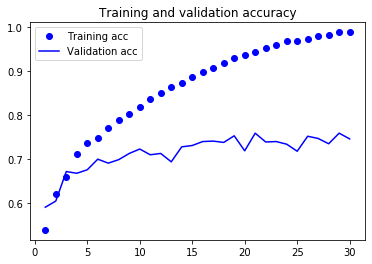

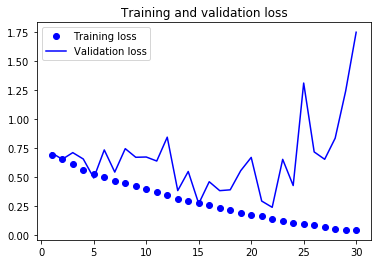

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### На модели явно заметен эффект переобучения

In [8]:
from keras.preprocessing import image
import numpy as np

In [50]:
img = image.load_img('1.jpg', target_size=(150, 150))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X /= 255

In [51]:
model.predict(X)

array([[0.1517309]], dtype=float32)

### Настройка генератора расширенных данных 

In [19]:
datagen = ImageDataGenerator(rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        fill_mode='nearest')

#### Отобразим элементы выборки, подвергшиеся изменению

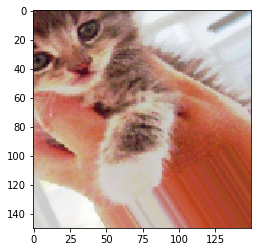

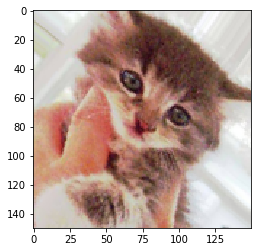

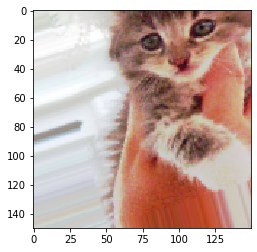

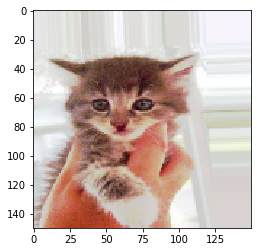

In [23]:
fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Новая сверточная нейросеть, включающая в себя слой прореживания

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

#### Данная сеть будет обучена на данных с расширениями

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [29]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.


In [31]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 173s 2s/step - loss: 0.6939 - acc: 0.5152 - val_loss: 0.6935 - val_acc: 0.6123
Epoch 2/100
100/100 [==============================] - 170s 2s/step - loss: 0.6829 - acc: 0.5446 - val_loss: 0.6394 - val_acc: 0.6102
Epoch 3/100
100/100 [==============================] - 171s 2s/step - loss: 0.6646 - acc: 0.6040 - val_loss: 0.6304 - val_acc: 0.6485
Epoch 4/100
100/100 [==============================] - 170s 2s/step - loss: 0.6503 - acc: 0.6171 - val_loss: 0.6595 - val_acc: 0.6514
Epoch 5/100
100/100 [==============================] - 169s 2s/step - loss: 0.6297 - acc: 0.6424 - val_loss: 0.4636 - val_acc: 0.6796
Epoch 6/100
100/100 [==============================] - 170s 2s/step - loss: 0.6149 - acc: 0.6607 - val_loss: 0.5200 - val_acc: 0.6733
Epoch 7/100
100/100 [==============================] - 170s 2s/step - loss: 0.6071 - acc: 0.6683 - val_loss: 0.6893 - val_acc: 0.6288
Epoch 8/100
100/100 [==============================] - 170s 2s

Epoch 62/100
100/100 [==============================] - 175s 2s/step - loss: 0.4157 - acc: 0.8031 - val_loss: 0.3037 - val_acc: 0.8020
Epoch 63/100
100/100 [==============================] - 170s 2s/step - loss: 0.4220 - acc: 0.8049 - val_loss: 0.4071 - val_acc: 0.7680
Epoch 64/100
100/100 [==============================] - 169s 2s/step - loss: 0.4122 - acc: 0.8103 - val_loss: 0.3678 - val_acc: 0.8061
Epoch 65/100
100/100 [==============================] - 171s 2s/step - loss: 0.3985 - acc: 0.8207 - val_loss: 0.3212 - val_acc: 0.8141
Epoch 66/100
100/100 [==============================] - 169s 2s/step - loss: 0.4009 - acc: 0.8191 - val_loss: 0.4715 - val_acc: 0.7796
Epoch 67/100
100/100 [==============================] - 170s 2s/step - loss: 0.4061 - acc: 0.8125 - val_loss: 0.4623 - val_acc: 0.7684
Epoch 68/100
100/100 [==============================] - 170s 2s/step - loss: 0.4009 - acc: 0.8226 - val_loss: 0.4540 - val_acc: 0.7990
Epoch 69/100
100/100 [==============================] -

In [35]:
model.save('cats_and_dogs_small_2.h5')